In [63]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

In [64]:
insurance = pd.read_csv("/Users/rishienugala/Desktop/insurance-charges-mlr/data/insurance.csv")

In [65]:
print(insurance.info())

print("\n", insurance.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

                age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
m

In [66]:
#Checking for null values
print(insurance.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [67]:
insurance['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [68]:
#Converting nominal values to numerical values
insurance['sex'] = insurance['sex'].map({'female':0, 'male':1})
insurance['smoker'] = insurance['smoker'].map({'yes':1, 'no':0})
insurance['region'] = insurance['region'].map({'northeast':0, 'northwest':2, 'southeast':3, 'southwest':4})

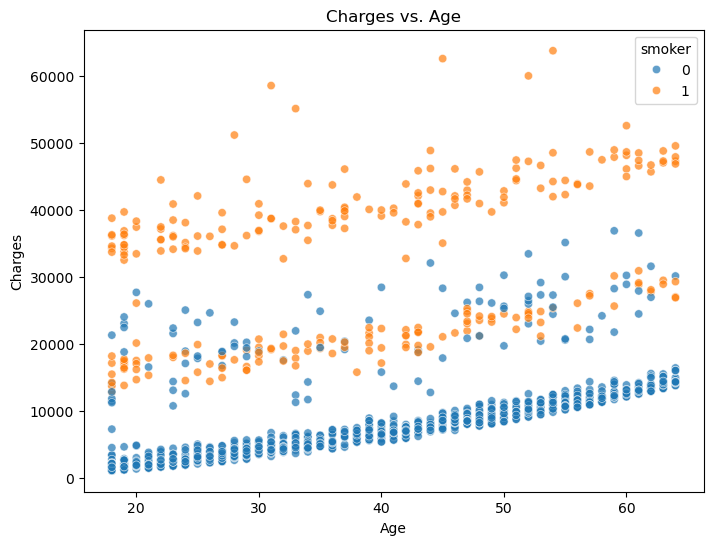

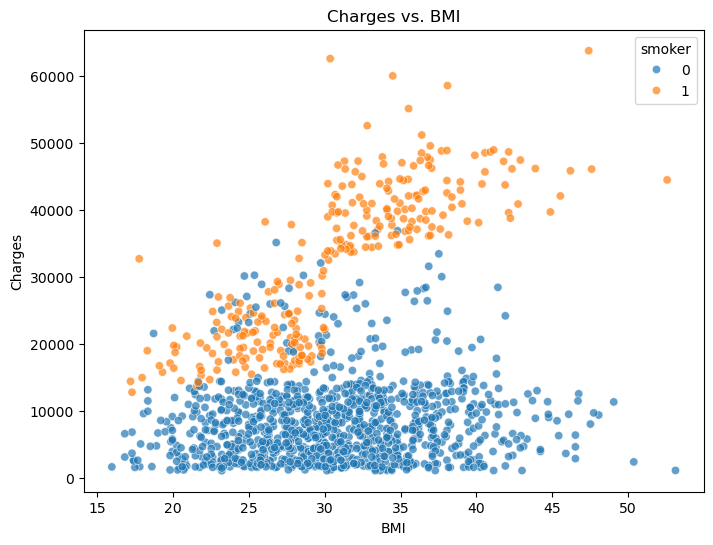

In [69]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='charges', hue='smoker', data=insurance, alpha=0.7)
plt.title("Charges vs. Age")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=insurance, alpha=0.7)
plt.title("Charges vs. BMI")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()


In [70]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,4,16884.92400
1,18,1,33.770,1,0,3,1725.55230
2,28,1,33.000,3,0,3,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,3,1629.83350
1336,21,0,25.800,0,0,4,2007.94500


In [71]:
#Splitting dataset
x = insurance.iloc[:,:-1]
t = insurance.iloc[:,-1]

x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.2, random_state=0)

In [72]:
#Creating ones vector for training data

ones_vec = np.arange(x_train.shape[0])
ones_vec = ones_vec.reshape(x_train.shape[0], 1)
ones_vec = np.ones_like(ones_vec)

print(ones_vec.shape)

(1070, 1)


In [73]:
#Design matrix for training set X_train
X_train = np.column_stack((ones_vec, x_train))
print(X_train)
print("Shape of X", X_train.shape)

[[ 1. 37.  1. ...  4.  1.  4.]
 [ 1. 18.  1. ...  0.  0.  3.]
 [ 1. 23.  0. ...  2.  1.  0.]
 ...
 [ 1. 40.  1. ...  0.  0.  3.]
 [ 1. 19.  1. ...  0.  0.  2.]
 [ 1. 33.  0. ...  1.  0.  4.]]
Shape of X (1070, 7)


In [74]:
#calculating model parameters w
w = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X_train), X_train)), X_train.T), t_train)
print(w)

[-11599.08802665    253.91210932    -24.65618308    328.57381706
    442.37097885  23571.00114021   -220.59860789]


In [75]:
#Creating ones vector for testing data
ones_vec_test = np.arange(x_test.shape[0])
ones_vec_test = ones_vec_test.reshape(x_test.shape[0], 1)
ones_vec_test = np.ones_like(ones_vec_test)

print("Ones vector shape:", ones_vec_test.shape)

X_test = np.column_stack((ones_vec_test, x_test))
print(X_test)
print("Shape of X", X_test.shape)

Ones vector shape: (268, 1)
[[ 1. 52.  1. ...  1.  0.  4.]
 [ 1. 47.  0. ...  1.  0.  3.]
 [ 1. 48.  1. ...  2.  1.  2.]
 ...
 [ 1. 57.  1. ...  0.  0.  0.]
 [ 1. 30.  0. ...  3.  1.  3.]
 [ 1. 46.  1. ...  3.  0.  0.]]
Shape of X (268, 7)


In [76]:
#Making predictions
def predict(X_test, w):
    return np.matmul(X_test, w)

predictions = predict(X_test, w)
predictions

array([11062.59129763,  9765.56927382, 37907.17980904, 16034.36034203,
        6839.98973098,  4032.53284695,  1617.74993718, 14191.5036034 ,
        8861.70286185,  7340.59252711,  4603.93915105, 10155.26766477,
        8703.46635169,  4105.84525013, 27726.04045272, 11014.47324083,
       11160.70036479,  6095.7049279 ,  8082.53057371, 27107.78669353,
       33487.30704191, 14175.90133038, 11749.05825992, 32388.1957569 ,
        4396.46417394,  9211.1177275 ,  1191.49233139, 10065.64942221,
        4067.88158988, 10265.70400303,  8870.09487855, 40226.17336965,
       15525.07289485, 13714.8307479 , 24808.13846343,  5195.3419636 ,
       12820.82155044, 30576.85947992, 33340.94908262,  3538.26783647,
        4065.58104673,  4258.26358571, 30527.46370269, 39260.14942266,
       27988.4804165 ,  4914.40335268, 10906.0438812 ,  7688.15814089,
        3671.19864732, 10533.67749306,  5696.61661969,  3288.22448183,
       32895.08160301, 38422.20354773, 16236.54716349,  7128.80805894,
      

In [77]:
'''Model evaluation metrics'''
def metrics(predictions, t_test):
    '''This function returns r-square, mean absolute error, and mean squared error'''
    mae = np.mean(np.abs(predictions-t_test))

    mse = np.square(np.abs(t_test - predictions)).mean() 
    rmse = mse**0.5

    rss = np.sum(np.square((t_test - predictions)))
    mean = np.mean(t_test)
    sst = np.sum(np.square(t_test - mean))
    r_square = 1 - (rss/sst)

    return mae, rmse, r_square

In [78]:
mae, rmse, r_square = metrics(predictions, t_test)

print("Mean Absolute Error: ", mae)
print("Root Mean Square Error: ", rmse)
print("R square: ", r_square)

Mean Absolute Error:  3924.429524537137
Root Mean Square Error:  5642.9228984293795
R square:  0.7998957683835811


#### Using high correlation features

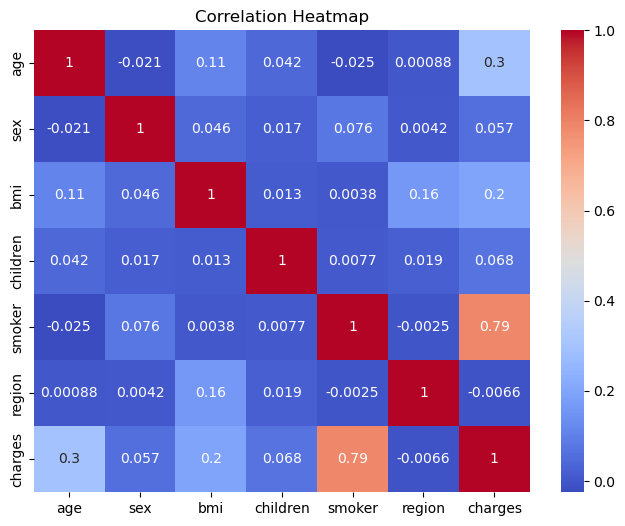

In [79]:
#plotting correlation matrix
plt.figure(figsize=(8, 6))
corr_matrix = insurance.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [80]:
#dropping less correlated features
x_corr = insurance.drop(columns=['children', 'sex', 'region', 'charges'])
t_corr = insurance['charges']

In [81]:
print(x_corr)

      age     bmi  smoker
0      19  27.900       1
1      18  33.770       0
2      28  33.000       0
3      33  22.705       0
4      32  28.880       0
...   ...     ...     ...
1333   50  30.970       0
1334   18  31.920       0
1335   18  36.850       0
1336   21  25.800       0
1337   61  29.070       1

[1338 rows x 3 columns]


In [82]:
#splitting correlated datasets
x_train_corr, x_test_corr, t_train_corr, t_test_corr = train_test_split(x_corr, t_corr, test_size=0.2, random_state=0)

In [83]:
#creating ones vector for x_corr
ones_vec_corr = np.arange(x_train_corr.shape[0])
ones_vec_corr = ones_vec_corr.reshape(x_train_corr.shape[0], 1)
ones_vec_corr = np.ones_like(ones_vec_corr)

print(ones_vec_corr.shape)

(1070, 1)


In [84]:
x_train_corr.shape

(1070, 3)

In [85]:
X_train_corr = np.column_stack((ones_vec, x_train_corr))
print(X_train_corr)
print("Shape of X", X_train_corr.shape)

[[ 1.   37.   34.1   1.  ]
 [ 1.   18.   34.43  0.  ]
 [ 1.   23.   36.67  1.  ]
 ...
 [ 1.   40.   25.08  0.  ]
 [ 1.   19.   35.53  0.  ]
 [ 1.   33.   18.5   0.  ]]
Shape of X (1070, 4)


In [86]:
#calculating W
w_corr = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X_train_corr), X_train_corr)), X_train_corr.T), t_train_corr)
print(w_corr)

def predict(X_test, w):
    return np.matmul(X_test, w)

[-11571.90801684    257.04066602    321.83997719  23625.23448834]


In [87]:
ones_vec_test_corr = np.arange(x_test_corr.shape[0])
ones_vec_test_corr = ones_vec_test_corr.reshape(x_test_corr.shape[0], 1)
ones_vec_test_corr = np.ones_like(ones_vec_test_corr)

print(ones_vec_test.shape)

X_test_corr = np.column_stack((ones_vec_test, x_test_corr))
print(X_test_corr)
print("Shape of X", X_test_corr.shape)

(268, 1)
[[ 1.    52.    30.2    0.   ]
 [ 1.    47.    29.37   0.   ]
 [ 1.    48.    40.565  1.   ]
 ...
 [ 1.    57.    40.28   0.   ]
 [ 1.    30.    39.05   1.   ]
 [ 1.    46.    24.795  0.   ]]
Shape of X (268, 4)


In [88]:
#Making predictions
predictions_corr = predict(X_test_corr, w_corr)
predictions_corr

array([11513.77392719,  9961.44341604, 37446.71711504, 16459.79093476,
        7346.37753831,  4046.80414018,  1524.04297124, 13247.3135201 ,
        7918.42300273,  6394.31152111,  3282.43419435,  9718.76948594,
        9103.85593988,  4734.36380722, 28165.86380389, 10343.13904169,
       11677.68018944,  5567.73015852,  7612.6750244 , 27069.79949193,
       33142.4226728 , 13706.99730869, 11731.0159118 , 33091.0443395 ,
        4951.52266526,  8669.28884411,  1189.84383726,  9330.43787112,
        4680.51364257,  9809.43205835,  7943.30756943, 40459.22242811,
       16401.42842313, 14569.9597633 , 24826.45878785,  5128.3025266 ,
       12536.5945493 , 30965.44028971, 32883.25836459,  4286.17654395,
        4071.68870689,  4874.48026036, 30577.70624376, 38855.28145755,
       28539.86161928,  4343.67642411, 10236.93184922,  7693.01895564,
        3202.09026311, 10797.13259915,  5560.9781063 ,  2300.85520042,
       33402.79780164, 37086.57159327, 16824.7640562 ,  7029.63022338,
      

In [89]:
def metrics(predictions, t_test):

    mae = np.mean(np.abs(predictions-t_test))

    mse = np.square(np.abs(t_test - predictions)).mean() 
    rmse = mse**0.5

    rss = np.sum(np.square((t_test - predictions)))
    mean = np.mean(t_test)
    sst = np.sum(np.square(t_test - mean))
    r_square = 1 - (rss/sst)

    return mae, rmse, r_square

In [90]:
mae, rmse, r_square = metrics(predictions_corr, t_test_corr)

print("Mean Absolute Error: ", mae)
print("Root Mean Square Error: ", rmse)
print("R square: ", r_square)   

Mean Absolute Error:  3960.8666198087244
Root Mean Square Error:  5717.800096079449
R square:  0.7945500805653087


### K-fold cross validatoin

In [91]:
'''K-fold cross validation'''
def k_fold(x, t, k):
    '''Performs k fold cross validation and returns average accuracy'''

    folds = np.array_split(np.column_stack((x, t)), k)

    r2_scores = []
    mae_scores = []
    rmse_scores = []

    for i in range(k):
        validation_set = folds[i]
        training_set = np.vstack([folds[j] for j in range(k) if j != i])

        x_train = training_set[:, :-1]
        t_train = training_set[:, -1]

        x_validation = validation_set[:, :-1]
        t_validation = validation_set[:, -1]

        ones_train = np.ones((x_train.shape[0], 1))
        ones_validation = np.ones((x_validation.shape[0], 1))

        X_train = np.column_stack((ones_train, x_train))
        X_validation = np.column_stack((ones_validation, x_validation))

        w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ t_train

        predictions = X_validation @ w

        #calculating mae, rmse, r2 at each fold
        mae = np.mean(np.abs(predictions-t_validation))

        mse = np.mean((t_validation - predictions) ** 2)
        rmse = np.sqrt(mse)

        rss = np.sum((t_validation - predictions) ** 2)
        t_mean = np.mean(t_validation)
        sst = np.sum((t_validation - t_mean) ** 2)
        r2 = 1 - (rss / sst)

        mae_scores.append(mae)
        rmse_scores.append(rmse)
        r2_scores.append(r2)

    return mae_scores, rmse_scores, r2_scores

K = 10
mae_scores, rmse_scores, r2_scores = k_fold(x, t, K)


In [92]:
print(f"R^2 Scores: {r2_scores}")
print(f"MAE Sores: {mae_scores}")
print(f"RMSE Scores: {rmse_scores}")


print(f"MAE mean: {np.mean(mae_scores)}")
print(f"RMSE mean: {np.mean(rmse_scores)}")
print(f"R^2 mean: {np.mean(r2_scores)}")

R^2 Scores: [0.7853206271921915, 0.7319955515333332, 0.7347591021759771, 0.6723427164826878, 0.7716368861171358, 0.7843521576275684, 0.7933032584500619, 0.6702643518646729, 0.7417851232145235, 0.7626814619291659]
MAE Sores: [4211.684216315712, 4244.568834045333, 4290.769618343275, 4222.13714372304, 4225.949843087779, 3751.026332419329, 3654.247412954092, 4835.83814730154, 4192.2598704496995, 4282.657212048082]
RMSE Scores: [5985.805807211799, 6201.084456724101, 6089.25938411429, 6239.045730014803, 6214.475236856366, 5154.104561519391, 5543.701405814022, 6947.113076453597, 5780.0701350632, 6452.364049514913]
MAE mean: 4191.113863068788
RMSE mean: 6060.702384328649
R^2 mean: 0.7448441236587318


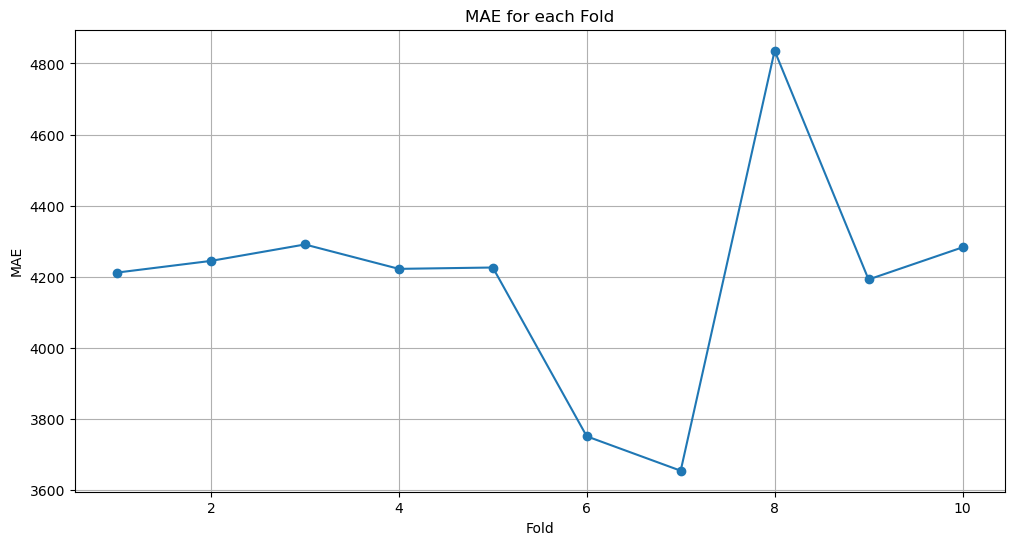

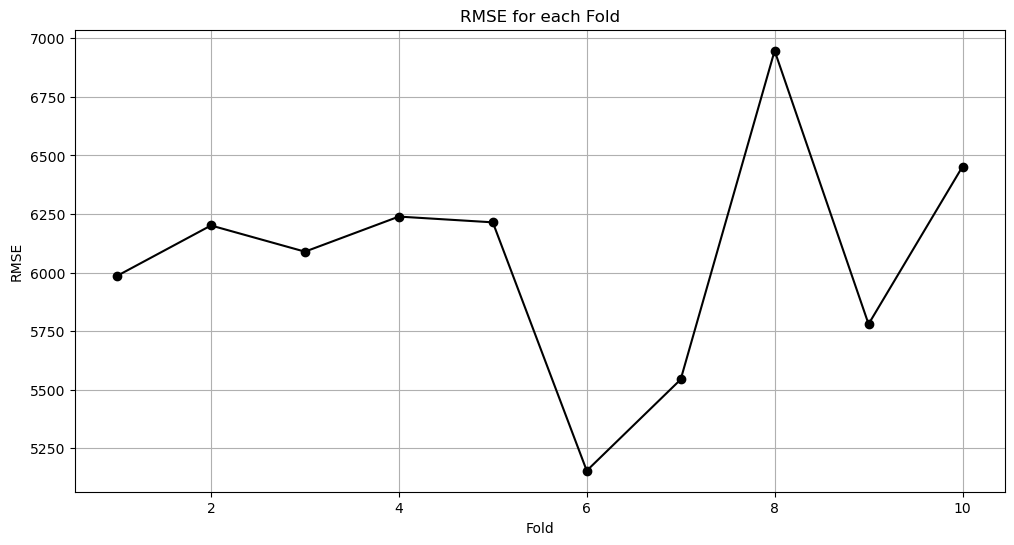

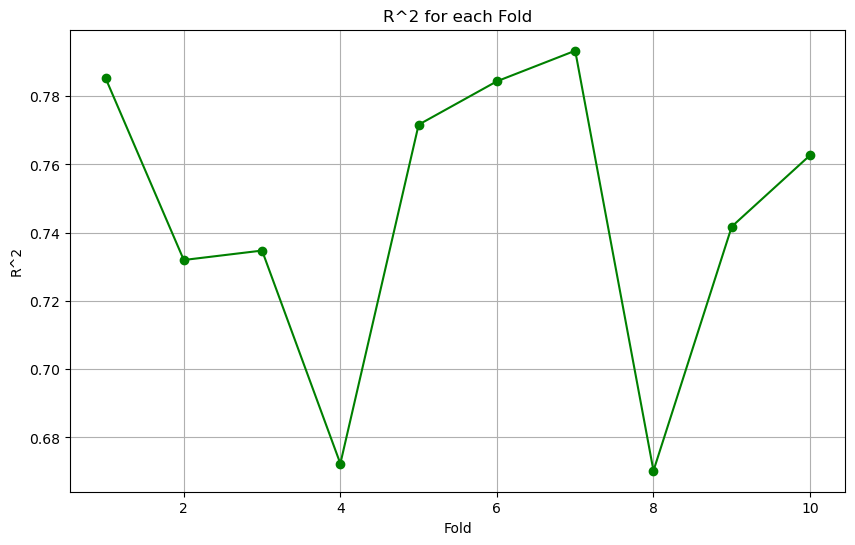

In [93]:
folds = list(range(1, K + 1))

plt.figure(figsize=(12, 6))
plt.plot(folds, mae_scores, marker='o')
plt.title('MAE for each Fold')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(folds, rmse_scores, marker='o', color='black')
plt.title('RMSE for each Fold')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(folds, r2_scores, marker='o', color='green')
plt.title('R^2 for each Fold')
plt.xlabel('Fold')
plt.ylabel('R^2')
plt.grid()
plt.show()